# An Introduction to the Discrete Fourier Transform

# Lecture 2: Digital Audio Basics

## The following is the exercises for Lecture 2 on the Discrete Fourier Transform. See this lecture video [here](https://www.youtube.com/watch?v=z6mzctYjVMc). For more supplemental resources, see also the course [website](https://longbaonguyen.github.io/courses/dft/discrete_fourier.html). 

### The "clarinet.wav" file is synthesized by one of my students Lukas Maldonadowerk.


## Exercises


In [1]:
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
from scipy.io import wavfile
%matplotlib notebook

In [15]:
np.linspace(0,1,10, endpoint=False)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

#### Create arrays of time samples `ts` and samples `ys` of the mathematically pure tone A4 with frequency 440 Hz sampling at the rate of 44100 Hz for 2 seconds. This is concert A. Hint: $y(t) = \sin(2\pi\cdot ft), t\in [0,L]$ is the sinuosoid with frequency $f$ Hz.

#### Use np.linspace(begin, end, samples, endpoint=False) for the time samples `ts` to include `begin` but exclude `end`.  For example, if we want 10 samples in the interval [0,1] second, use np.linspace(0, 1, 10, endpoint=False) to generate the time array array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]) which is correct since 10 Hz sampling rate should samples every 0.1 second. Try it with the endpoint=True to see the difference. 

#### Create an Audio object and play this tone. This sound is essentially simulating the pure tone of a tuning fork.

In [6]:
fs = 44100 # sampling rate
L = 2 # length of audio
N = fs*L  # number of samples
ts = np.linspace(0,L,N,endpoint=False) # time samples at sampling rate fs (use np.linspace)
ys = np.sin(2*np.pi*440*ts)
Audio(ys, rate = fs)

#### The following two functions are taken from the previous Lecture 1's exercises. It will be helpful to use these functions in the following problems.

In [7]:
def plot_signal_time(ys, t1, t2, fs = 44100):
    """ plots the signal ys on the time domain [t2, t2] 
    at the sampling rate fs. 
    """
    N = ys.size # num of samples
    L = N/fs # duration of audio clip
    ts = np.linspace(0,L,N) # array of N equally spaced values from [0,L]
    fig, ax = plt.subplots()
    ax.plot(ts, ys)
    ax.set_xlim(t1, t2)
    ax.set_xlabel("Time(in seconds)")



In [8]:
def plot_signal_frequency(ys, f1, f2, fs = 44100):
    """ plots the signal ys on the frequency domain [f1, f2] 
    at the sampling rate fs. 
    """
    N = ys.size
    L = N/fs
    yk = np.fft.fft(ys)
    k = np.arange(N) # 0 to N-1
    freqs = k/L
    fig, ax = plt.subplots()
    ax.plot(freqs, np.abs(yk))
    ax.set_xlim(f1,f2)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("|yk|")


#### Call plot_signal_time to graph the wave form of A4 above. Zoom in to the time interval [0, 0.1] seconds.

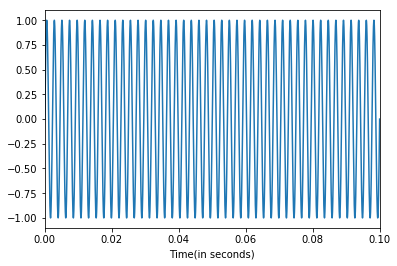

In [11]:
plot_signal_time(ys,0,0.1)

#### Call plot_signal_frequency to graph the frequency domain representation of A4 above. Zoom in on the interval [0, 500] Hz. 

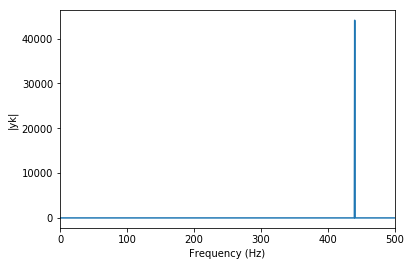

In [12]:
plot_signal_frequency(ys,0,500)

### Note the lone frequency at 440 Hz in the frequency domain above.

#### Sample from the waveform which is the sum of two sinusoids with frequencies 6 Hz and 10 Hz at the sampling rate of 100 Hz for 1 second. Plot its time domain graph using `plot_signal_time` function above.

#### Hint: $y(t) = \sin(2\pi\cdot ft), t\in [0,L]$ is the sinuosoid with frequency $f$ Hz.

#### First initialize variables N: number of samples, fs: sampling rate and L: length of audio


In [16]:
N = 100*1
fs = 100
L = 1


#### Use `np.linspace(start, stop, num, endpoint=False)` to create array of time samples `ts` and array of samples `ys`.

In [17]:
ts = np.linspace(0,L,N,endpoint=False)
ys = np.sin(2*np.pi*6*ts)+np.sin(2*np.pi*10*ts)


#### Call `plot_signal_time` to plot waveform.

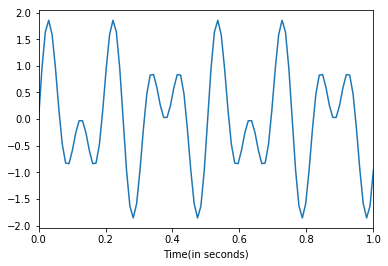

In [18]:
plot_signal_time(ys,0,1,fs=100)

#### Plot its frequency domain graph using `plot_signal_frequency` above on the domain [0, 50] Hz interval.

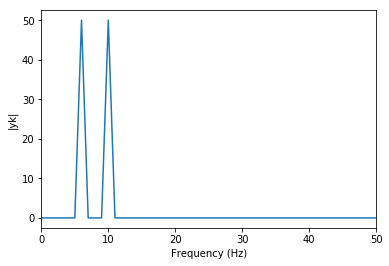

In [19]:
plot_signal_frequency(ys,0,50,fs=100)

### Note that the frequecies 6 and 10 Hz show up in the frequency domain graph.

#### Plot again its frequency domain graph but on the [0,100] Hz interval. What do you notice? (In Lecture 3, we learn that every real signal has a symmetric spectrum. We will also prove this in the exercises for Lecture 4). (For example 90 Hz is an **alias** of 10 Hz, see Lecture 3.)

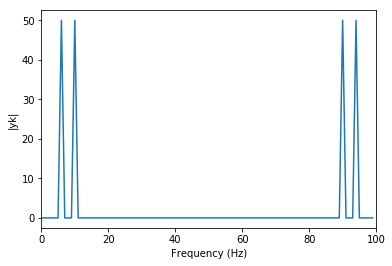

In [20]:
plot_signal_frequency(ys,0,100,fs=100)

#### Create an array of samples `ys1` of the sinusoid with frequency 6 Hz at the rate 100 Hz for L = 0.5 second. And an array `ys2` with frequency 10 Hz at the same rate and length. Use np.append() to concatenate the arrays. Call this array `ys3`. This audio is the notes played in succession rather than together as a chord: half of a second at 6 Hz and the second half of a second 10 Hz. Plot the `y3` array using plot_signal_time on the [0,1] interval.

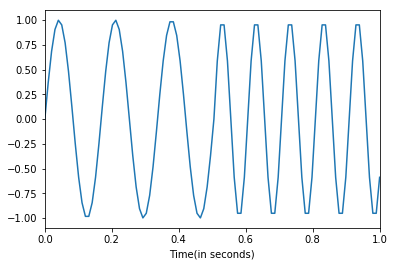

In [21]:
ts = np.linspace(0,.5,50,endpoint=False)
ys1 = np.sin(2*np.pi*6*ts)
ys2 = np.sin(2*np.pi*10*ts)
ys3 = np.append(ys1, ys2)
plot_signal_time(ys3,0,1,fs=100)

#### Now plot the frequency domain of `y3` on the interval [0,50] Hz. Compare this to the previous frequency domain representation of the array `ys`.

#### What do you notice? 
### Answer: The two frequency domain graphs are essentially the same. The DFT extract frequency content but cannot tell WHEN the frequencies occur, that is, it does not have the time information. For this reason, typically, the DFT is calculated repeatedly on very small time intervals and combined to get a spectrogram, which serves as a fingerprint to an audio file. Music apps like Shazam uses this spectrogram to identify songs. 

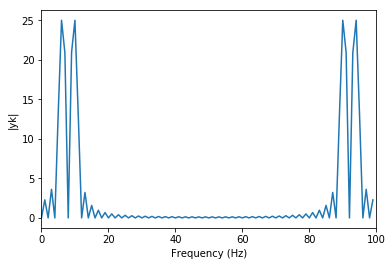

In [22]:
plot_signal_frequency(ys3,0,100,fs=100)

#### Read in the "clarinet.wav" file and play the audio.

In [23]:
fs, ys = wavfile.read("clarinet.wav")
Audio(ys, rate = fs)

#### Plot the frequency domain representation. 

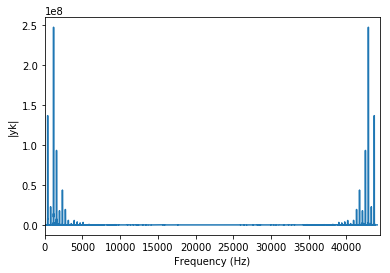

In [38]:
plot_signal_frequency(ys, 0, 44400)

#### Programmatically find the fundamental frequency and the dominant frequency(largest Fourier coefficent magnitude) exactly. HInt: Use np.argsort(array) to sort the array to find the index of the largest. Then use the formula $f_k=k/L$ to find the corresponding frequency.

#### Hint: Note from the frequency domain graph above that the fundamental frequency has the second largest Fourier magnitude. However, because, as we will see in Lecture 3, the spectrum is symmetric, ignore some of very high indices(greater than 80,000). For example, try the plot `plot_signal_frequency(ys, 0, 44400)` to see the symmetric spectrum.

In [39]:
yk = np.fft.fft(ys)
N = ys.size
L = N/fs

In [40]:
indices = np.argsort(np.abs(yk))
indices[-10:]

array([ 2304, 84200,  3073, 83431, 84199,  2305,   770, 85734,  2306,
       84198])

#### The fundamental frequency has the second largest magnitude thus use index 770(ignore indices greater than 80000, these refer to aliased frequencies of the symmetric spectrum, see Lecture 3) in the formula $f_k=k/L$.

In [41]:
770/L

392.5483214649034

### These frequencies are simply harmonics or integer multiples of the fundamental frequency 392 Hz which is a G4.

In [42]:
2306/L

1175.6057523351521

#### The dominant frequency is 1176 Hz. 